In [5]:
# Importing modules

import numpy as np;
import matplotlib.pyplot as plot;

In [6]:
# Finds, approximatly, the closest extreme point (Newton Raphson)

def FindClosestExtreme(x0, df, d2f, numIter, tolerance):
    x = x0;
    for i in range(numIter):
        secDer = d2f(x); 
        if (secDer == 0): secDer = tolerance; 
  
        x -= df(x) / secDer;
        if (abs(df(x)) <= tolerance): return x;
        
    return None; # No extreme points where found.

In [11]:
def FindExtremes(start, end, numPoints, df, d2f, numIter, tolerance): # Finds multiple extremes
    xValues = np.linspace(start, end, numPoints);
    
    extremaFound = [];
    for x in xValues:
        CE = FindClosestExtreme(x, df, d2f, numIter, tolerance);
        if (not CE or CE < start or CE > end): continue;
        
        extremaFound.append(CE);

    return np.unique( np.round(extremaFound, int(abs(np.log10(tolerance)) / 2)) );

In [8]:
def Plot(start, end, f, numPoints, extremePoints): # Plot function
    x = np.linspace(start, end, numPoints);
    y = f(x);
    
    plot.plot(x, y, color="k");
    plot.ylabel("f(x)");
    plot.xlabel("x");
    
    for point in extremePoints:
        plot.scatter(point, f(point), color="g");

In [9]:
# Defining functions

def f(x):   return np.sin(x);
def df(x):  return np.cos(x);
def d2f(x): return -np.sin(x);

[-1.571  1.571]


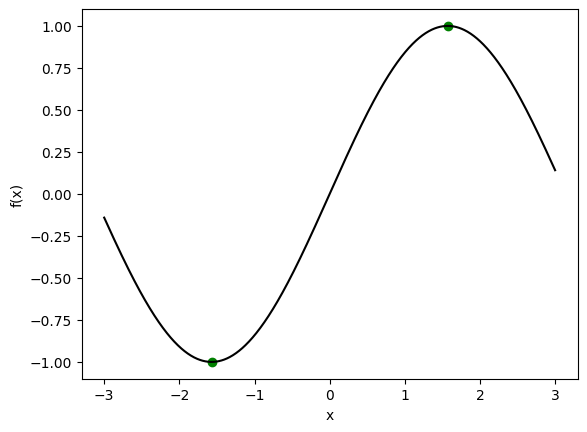

In [12]:
start, end = -3, 3;
numIter, tolerance = 20, 1e-6;
numPoints = 1000;

extremePoints = FindExtremes(start, end, numPoints, df, d2f, numIter, tolerance);
print(extremePoints);

Plot(start, end, f, numPoints, extremePoints);